[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   43.5s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 903 out of 903 | elapsed:  4.3min finished

[2024-05-25 11:16:46] Features: 1/20 -- score: 0.7352819128799328[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   52.4s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done 902 out of 902 | elapsed:  5.2min finished

[2024-05-25 11:21:56] Features: 2/20 -- score: 0.8331351868584855[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_job

选中的特征：
Index(['SpAbs_A', 'ATS4dv', 'ATS1Z', 'ATS3p', 'ATSC5v', 'AATSC0s', 'AATSC1v',
       'AATSC1are', 'GATS1dv', 'GATS1s', 'BCUTs-1h', 'nBondsO', 'NsOH',
       'ETA_alpha', 'PEOE_VSA2', 'SMR_VSA5', 'n9FaRing', 'GGI4', 'JGI8',
       'JGI10'],
      dtype='object')


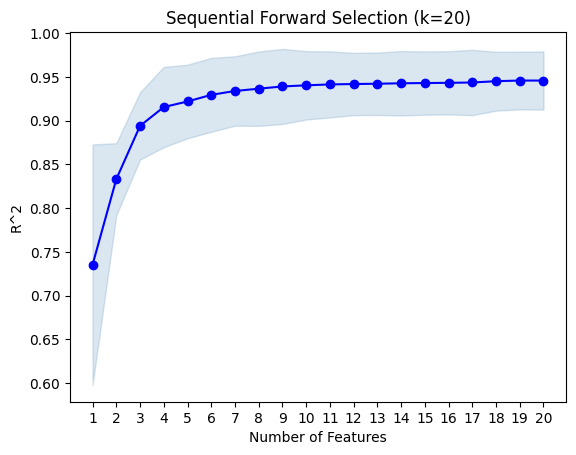

In [1]:
# 导入必要的库
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import warnings

# 忽略 FutureWarning 类型的警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 生成示例数据
dataset = pd.read_excel('BP-1054-feature.xlsx')
dataset = dataset.replace(np.nan, 0)
X = dataset.iloc[:, 6:2172]
Y = dataset.iloc[:, 5]
# 设置并行作业的数量
n_jobs = 8
# 使用前向特征选择
sfs1 = SFS(RandomForestRegressor(random_state=42),
           k_features=20,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=n_jobs)

try:
    # 进行特征选择
    sfs1 = sfs1.fit(np.array(X), Y)
except ValueError as e:
    print(f"Error: {e}")
    print("可能无法找到足够数量的特征或模型无法收敛。")

# 获取选中特征的列索引
selected_feature_idx = sfs1.k_feature_idx_
selected_features = X.columns[list(selected_feature_idx)]
print(f"选中的特征：\n{selected_features}")

fig = plot_sequential_feature_selection(sfs1.get_metric_dict())
plt.ylabel('R^2')
plt.xlabel('Number of Features')
plt.title('Sequential Forward Selection (k=20)')
plt.show()


In [2]:
# 创建一个新的数据框，只包含选择的特征
selected_data = dataset[selected_features]

# 将选择的特征存储到Excel中
selected_data.to_excel('BP-1504-select-FEATURE.xlsx', index=False)